In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

plt.set_cmap('jet');
%matplotlib inline
import mltools as ml
import warnings
warnings.filterwarnings('ignore'); # for deprecated matplotlib functions

In [2]:
#read the data
df = pd.read_csv('adult.data',
                  names=["Age","WorkClass","fnlwgt","education","education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country","income"])

In [3]:
#read the test data
dfTEST = pd.read_csv('adult.test',
                  names=["Age","WorkClass","fnlwgt","education","education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country","income"])

Data cleaning

In [4]:
dfTEST.head() # testing if object has the right type of data in it
dfTEST = dfTEST.drop([0]) # droping the first row 
dfTEST.head() # testing if object has the right type of data in it

,Age,WorkClass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.
5,18,?,103497.0,Some-college,10.0,Never-married,?,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K.


In [5]:
df.head()# testing if object has the right type of data in it

,Age,WorkClass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
df.tail()# testing if object has the right type of data in it

,Age,WorkClass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


Data Exploration

In [7]:
df.shape #Get information about number of rows and columns in the data


(32561, 15)

In [8]:
df.columns # See the column labels of the Data 

Index(['Age', 'WorkClass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [9]:
df["Age"].unique()# See unique values of the Age column

array([39, 50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 40, 34, 25, 43,
       54, 35, 59, 56, 19, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 18, 47,
       46, 36, 79, 27, 67, 33, 76, 17, 55, 61, 70, 64, 71, 68, 66, 51, 58,
       26, 60, 90, 75, 65, 77, 62, 63, 80, 72, 74, 69, 73, 81, 78, 88, 82,
       83, 84, 85, 86, 87], dtype=int64)

In [10]:
df["WorkClass"].unique() # See unique values of the Workclass column

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

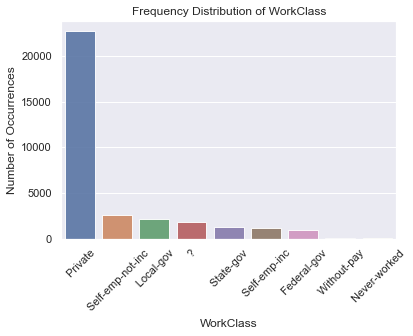

In [11]:
_count = df["WorkClass"].value_counts()#the count of unique occurrences in the specified column
sns.set(style="darkgrid")
sns.barplot(_count.index, _count.values, alpha=0.9) #plot the count of unique occurrences in the specified column
plt.title('Frequency Distribution of WorkClass') #set plot title
plt.ylabel('Number of Occurrences', fontsize=12) #set y axis label
plt.xlabel('WorkClass', fontsize=12) #set x axis label
plt.xticks(rotation=45) #rotate x axis lables
plt.show()

In [12]:
df["education"].unique() # See unique values of the education column

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

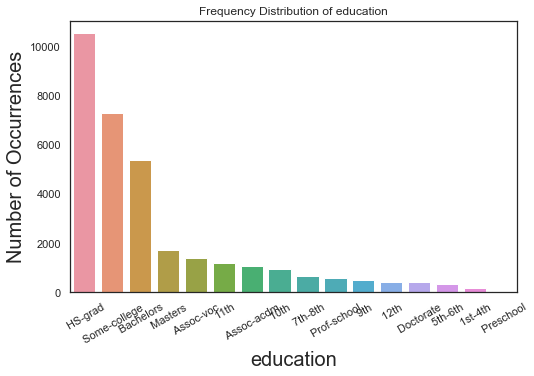

In [13]:
sns.set(rc={'figure.figsize':(8,5)})
_count = df["education"].value_counts()
sns.set(style="white")
sns.barplot(_count.index, _count.values, alpha=1)
plt.title('Frequency Distribution of education')
plt.ylabel('Number of Occurrences', fontsize=20)
plt.xlabel('education', fontsize=20)
plt.xticks(rotation=30)
plt.show()

In [14]:
df["marital-status"].unique()# See unique values of the marital status column

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

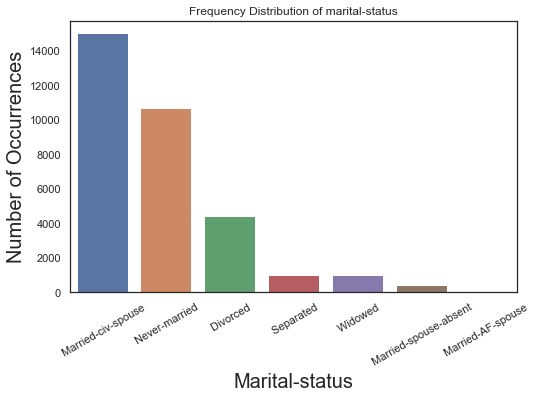

In [15]:
sns.set(rc={'figure.figsize':(8,5)})
_count = df["marital-status"].value_counts()
sns.set(style="white")
sns.barplot(_count.index, _count.values, alpha=1)
plt.title('Frequency Distribution of marital-status')
plt.ylabel('Number of Occurrences', fontsize=20)
plt.xlabel('Marital-status', fontsize=20)
plt.xticks(rotation=30)

plt.show()

In [16]:
df["race"].unique()# See unique values of the race column

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

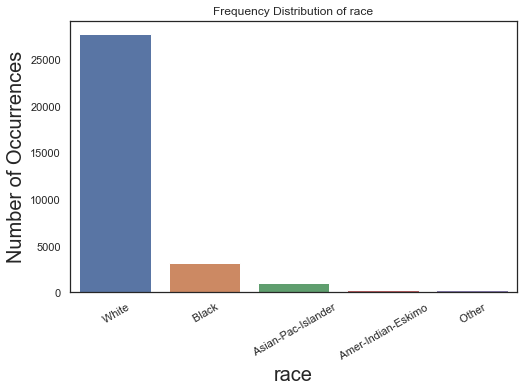

In [17]:
sns.set(rc={'figure.figsize':(8,5)})
_count = df["race"].value_counts()
sns.set(style="white")
sns.barplot(_count.index, _count.values, alpha=1)
plt.title('Frequency Distribution of race')
plt.ylabel('Number of Occurrences', fontsize=20)
plt.xlabel('race', fontsize=20)
plt.xticks(rotation=30)
plt.savefig('raceditribute.png', format='png')
plt.show()

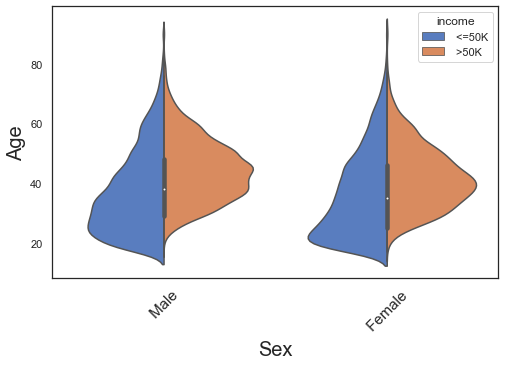

In [18]:
sns.set(rc={'figure.figsize':(8,5)})
sns.set(style="white")
#Violin plot

sns.violinplot(x="sex",y="Age", hue=df["income"], data=df,palette="muted",split=True);
plt.xlabel('Sex', fontsize=20)
plt.ylabel('Age', fontsize=20)
plt.xticks(rotation=45, fontsize = 15)
plt.show()

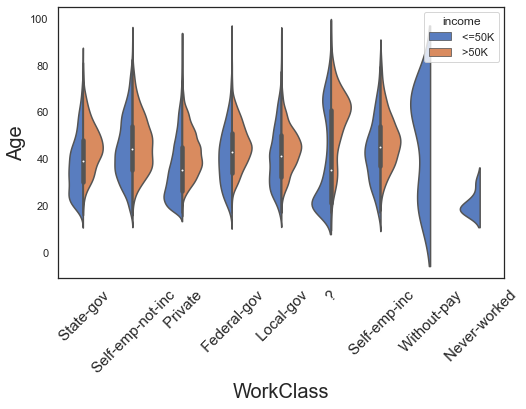

In [19]:
sns.set(rc={'figure.figsize':(8,5)})
sns.set(style="white")
#Violin plot
#sns.violinplot(x="income",y="hours-per-week", hue=df["sex"], data=df, palette="Set2", split=True, scale="count");
sns.violinplot(x="WorkClass",y="Age", hue=df["income"], data=df,palette="muted",split=True);
plt.xlabel('WorkClass', fontsize=20)
plt.ylabel('Age', fontsize=20)
plt.xticks(rotation=45, fontsize = 15)
plt.show()
plt.show()

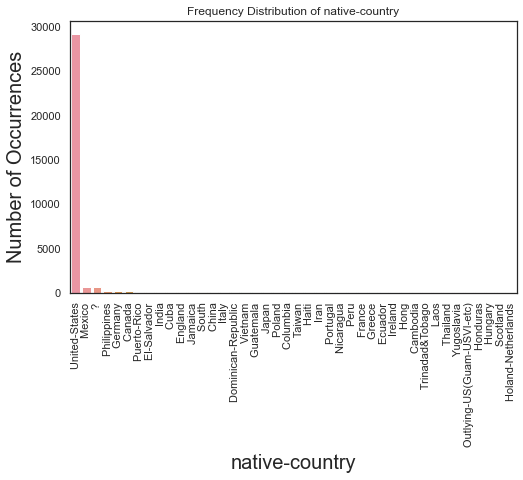

In [20]:
sns.set(rc={'figure.figsize':(8,5)})
_count = df["native-country"].value_counts()
sns.set(style="white")
sns.barplot(_count.index, _count.values, alpha=1)
plt.title('Frequency Distribution of native-country')
plt.ylabel('Number of Occurrences', fontsize=20)
plt.xlabel('native-country', fontsize=20)
plt.xticks(rotation=90)
plt.show()

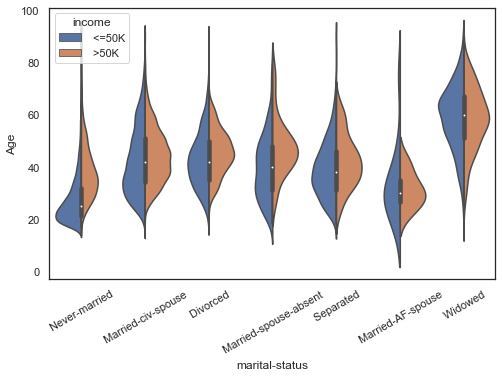

In [21]:
sns.set(rc={'figure.figsize':(8,5)})
sns.set(style='white')
#Violin plot
sns.violinplot(x="marital-status",y="Age", hue=df["income"], split= True, data=df);
plt.xticks(rotation=30)
plt.show()

By some data exploration and visualization, we see that some of the features do not affect the target value of the income significantly. In contrast, some features seem to be a determining factor in the distribution of the class values. For example, violin plots that illustrated the distribution of income values based on age and sex  and based on age and work class, showed that the sex does not seem to be a determining feature for the classification of the income, since the distribution of the data looks very similar for both male and female participants in the dataset. 
On the other hand, the distribution of income changes significantly across different work classes. 

Further, it seems that the frequency distribution of the data with respect to different features is not uniform; For example, although the majority of the people in the dataset are married and they have high school education, other categories of marital status and education are also observed in the data. 

On the other hand, comparing the native country and race, the data almost entirely features people from the United States and the majority of the people are white individuals as it is shown in Figures above. 

Therefore, it seems like features such as “sex”, “race”, and “native country” may be further excluded from the analysis.



# Transforming categorical features to numerical values for processing 

In [22]:
# defining features, dropping the columns that do not convey important information, education and education num convey the same info (high correlation together ) so one of them is dropped
X = df.drop(columns=['income','race','sex','native-country','education'])
Xrev=X
Xrev.head()

,Age,WorkClass,fnlwgt,education-num,marital-status,occupation,relationship,capital-gain,capital-loss,hours-per-week
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,2174,0,40
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,0,0,13
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,0,0,40
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,0,0,40
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,0,0,40


In [23]:
Xte = dfTEST.drop(columns=['income','race','sex','native-country','education'])
Xrev_te=Xte
Xrev_te.head()

,Age,WorkClass,fnlwgt,education-num,marital-status,occupation,relationship,capital-gain,capital-loss,hours-per-week
1,25,Private,226802.0,7.0,Never-married,Machine-op-inspct,Own-child,0.0,0.0,40.0
2,38,Private,89814.0,9.0,Married-civ-spouse,Farming-fishing,Husband,0.0,0.0,50.0
3,28,Local-gov,336951.0,12.0,Married-civ-spouse,Protective-serv,Husband,0.0,0.0,40.0
4,44,Private,160323.0,10.0,Married-civ-spouse,Machine-op-inspct,Husband,7688.0,0.0,40.0
5,18,?,103497.0,10.0,Never-married,?,Own-child,0.0,0.0,30.0


In [24]:
In = {' <=50K': 0,' >50K': 1} 
df.income = [In[item] for item in df.income]

In [25]:
In = {' <=50K.': 0,' >50K.': 1} 
dfTEST.income = [In[item] for item in dfTEST.income]

In [26]:
# defining target values 
y = df['income'].copy()
yte = dfTEST['income'].copy()

In [27]:
yte

1        0
2        0
3        1
4        1
5        0
        ..
16277    0
16278    0
16279    0
16280    0
16281    1
Name: income, Length: 16281, dtype: int64

In [28]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

class MultiColumnLabelEncoder:
    
    def __init__(self, columns = None):
        self.columns = columns # list of column to encode
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        
        output = X.copy()
        
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname, col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        
        return output
    
    def fit_transform(self, X, y=None):
        return self.fit(X, y).transform(X)
    
    print ('done')


done


In [29]:
le = MultiColumnLabelEncoder()
X_le = le.fit_transform(X)
X_le.head()

,Age,WorkClass,fnlwgt,education-num,marital-status,occupation,relationship,capital-gain,capital-loss,hours-per-week
0,22,7,2671,12,4,1,1,25,0,39
1,33,6,2926,12,2,4,0,0,0,12
2,21,4,14086,8,0,6,1,0,0,39
3,36,4,15336,6,2,6,0,0,0,39
4,11,4,19355,12,2,10,5,0,0,39


In [30]:
Xte_le = le.fit_transform(Xte)
Xte_le.head()

,Age,WorkClass,fnlwgt,education-num,marital-status,occupation,relationship,capital-gain,capital-loss,hours-per-week
1,8,4,8931,6,4,7,3,0,0,39
2,21,4,1888,8,2,5,0,0,0,49
3,11,2,11540,11,2,11,0,0,0,39
4,27,4,5146,9,2,7,0,90,0,39
5,1,0,2450,9,4,0,3,0,0,29


Explore feature correlation

In [31]:
print(X_le.shape)
print(Xte_le.shape)

(32561, 10)
(16281, 10)


In [32]:
from sklearn.model_selection import train_test_split
#split data to train and validation sets
X = X_le.values
Y = y[:,np.newaxis] 
X,Y = ml.shuffleData(X,Y)
Xtr, Xva, Ytr, Yva = train_test_split(X, Y, test_size=0.25, random_state=100)
#test data
Xte = Xte_le.values
Yte = yte[:,np.newaxis] 
Xte,Yte = ml.shuffleData(Xte,Yte)

In [33]:
print(type(X))
print(type(Y))
print(type(Xtr))
print(type(Xte))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [34]:
print(Xtr.shape)
print(Xte.shape)


(24420, 10)
(16281, 10)


In [35]:
Xva.shape
X.shape

(32561, 10)

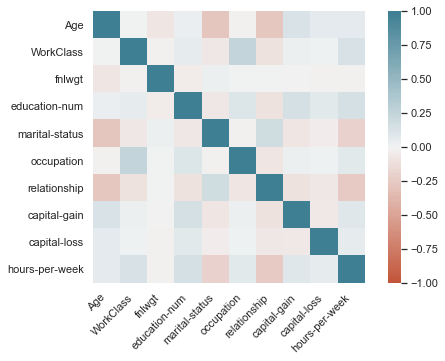

In [36]:
corr = X_le.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.savefig('corr.png')

In [37]:
from sklearn.model_selection import KFold, GridSearchCV, cross_val_score, cross_val_predict
cv = KFold(5)

implementing logistic regression

In [38]:
from sklearn.linear_model import LogisticRegression
learner = LogisticRegression(class_weight= 'balanced', solver='newton-cg',)
param_grid = {'C': [0.1, 0.4, 0.7, 1, 1.5, 2]}
grid= GridSearchCV(learner, param_grid, cv=cv).fit(X, Y)
print("Grid Logistic Regression: ", grid.best_score_, grid.best_params_)

Grid Logistic Regression:  0.7651483321393501 {'C': 0.1}


In [39]:
clf=grid.best_estimator_
print('Logistic regression train accuracy', (cross_val_score(clf, X, Y, cv=cv, scoring='accuracy').mean()))
print('Logistic regression train precision', (cross_val_score(clf, X, Y, cv=cv, scoring='precision').mean()))
print('Logistic regression train Recall', (cross_val_score(clf, X, Y, cv=cv, scoring='recall').mean()))
print('Logistic regression train F1', (cross_val_score(clf, X, Y, cv=cv, scoring='f1').mean()))
print('Logistic regression train roc_auc', (cross_val_score(clf, X, Y, cv=cv, scoring='roc_auc').mean()))


Logistic regression train accuracy 0.7651483321393501
Logistic regression train precision 0.5083380303426824
Logistic regression train Recall 0.7538451541995308
Logistic regression train F1 0.6071400036757506
Logistic regression train roc_auc 0.8480312231346703


In [40]:
from sklearn import metrics
Yhate = clf.predict_proba(Xte)[:, 1]
fprTE, tprTE, thresholds = metrics.roc_curve(Yte, Yhate)
aucTE = metrics.auc(fprTE, tprTE)
print('Logestic regression AUC on Test: ',  aucTE)

AUC on Test:  0.8451418933315435


Implementing nueral networks

In [41]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()
parameters= {'hidden_layer_sizes': [(5,5,5), (5,10,5), (10,), (5,)],
              'activation': ['logistic','tanh', 'relu'],
              'alpha': [0.0001, 0.05],
              'learning_rate': ['constant']}
model= GridSearchCV(mlp, parameters, cv=cv).fit(X, Y)
print("Grid MLP: ", model.best_score_, model.best_params_)

Grid MLP:  0.8017566643315146 {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (10,), 'learning_rate': 'constant'}


In [44]:
clf=model.best_estimator_
print('MLP train accuracy', (cross_val_score(clf, X, Y, cv=cv, scoring='accuracy').mean()))
print('MLP train precision', (cross_val_score(clf, X, Y, cv=cv, scoring='precision').mean()))
print('MLP train Recall', (cross_val_score(clf, X, Y, cv=cv, scoring='recall').mean()))
print('MLP train F1', (cross_val_score(clf, X, Y, cv=cv, scoring='f1').mean()))
print('MLP train roc_auc', (cross_val_score(clf, X, Y, cv=cv, scoring='roc_auc').mean()))

MLP train accuracy 0.7949997991165656
MLP train precision 0.6218150590321213
MLP train Recall 0.5304138201701951
MLP train F1 0.4207260403926093
MLP train roc_auc 0.7633513495523445


In [45]:
from sklearn import metrics
Yhate = clf.predict_proba(Xte)[:, 1]
fprTE, tprTE, thresholds = metrics.roc_curve(Yte, Yhate)
aucTE = metrics.auc(fprTE, tprTE)
print('MLP AUC on Test: ',  aucTE)

MLP AUC on Test:  0.8060972804814888


In [48]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=1)
param_grid = {'n_estimators': [100,250,300,350,400]}
grid1 = GridSearchCV(rfc, param_grid, cv=cv).fit(X, Y)
print("Grid RFC: ", grid1.best_score_, grid1.best_params_)

Grid RFC:  0.8578053022663802 {'n_estimators': 400}


In [49]:
from sklearn.ensemble import RandomForestClassifier
rfc = grid1.best_estimator_
param_grid = {'criterion': ['gini','entropy'],
              'max_depth': [5, 10, 15, 20, 25, 30]}
grid2 = GridSearchCV(rfc, param_grid, cv=cv).fit(X, Y)
print("Grid RFC: ", grid2.best_score_, grid2.best_params_)

Grid RFC:  0.8653911323073 {'criterion': 'entropy', 'max_depth': 15}


In [50]:
clf=grid2.best_estimator_
print('RFC train accuracy', (cross_val_score(clf, X, Y, cv=cv, scoring='accuracy').mean()))
print('RFC train precision', (cross_val_score(clf, X, Y, cv=cv, scoring='precision').mean()))
print('RFC train Recall', (cross_val_score(clf, X, Y, cv=cv, scoring='recall').mean()))
print('RFC train F1', (cross_val_score(clf, X, Y, cv=cv, scoring='f1').mean()))
print('RFC train roc_auc', (cross_val_score(clf, X, Y, cv=cv, scoring='roc_auc').mean()))

RFC train accuracy 0.8653911323073
RFC train precision 0.7851880605044089
RFC train Recall 0.6070574741721859
RFC train F1 0.6846626579911993
RFC train roc_auc 0.9186449323003731


In [51]:
from sklearn import metrics
Yhate = clf.predict_proba(Xte)[:, 1]
fprTE, tprTE, thresholds = metrics.roc_curve(Yte, Yhate)
aucTE = metrics.auc(fprTE, tprTE)
print('RFC AUC on Test: ',  aucTE)

RFC AUC on Test:  0.9118733378205253


In [52]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
param_grid = {'n_neighbors':[1,2,5,10,15,20,25,30,35,40,45,50,80,100,150,200]}
grid3 = GridSearchCV(knn, param_grid, cv=cv).fit(X, Y)
print("Grid KNN: ", grid3.best_score_, grid3.best_params_)

Grid KNN:  0.793710179338922 {'n_neighbors': 15}


In [53]:
clf=grid3.best_estimator_
print('KNN train accuracy', (cross_val_score(clf, X, Y, cv=cv, scoring='accuracy').mean()))
print('KNN train precision', (cross_val_score(clf, X, Y, cv=cv, scoring='precision').mean()))
print('KNN train Recall', (cross_val_score(clf, X, Y, cv=cv, scoring='recall').mean()))
print('KNN train F1', (cross_val_score(clf, X, Y, cv=cv, scoring='f1').mean()))
print('KNN train roc_auc', (cross_val_score(clf, X, Y, cv=cv, scoring='roc_auc').mean()))


KNN train accuracy 0.793710179338922
KNN train precision 0.7216200894317893
KNN train Recall 0.23368112865281057
KNN train F1 0.35288138750951803
KNN train roc_auc 0.739461760133687


In [54]:
Yhate = clf.predict_proba(Xte)[:, 1]
fprTE, tprTE, thresholds = metrics.roc_curve(Yte, Yhate)
aucTE = metrics.auc(fprTE, tprTE)
print('KNN AUC on Test: ',  aucTE)

KNN AUC on Test:  0.7262843541485929


In [57]:
from sklearn.ensemble import AdaBoostClassifier

Ada= AdaBoostClassifier()
param_grid = {'learning_rate':[0.1, 0.3, 0.5 ,0.8, 1, 1.2, 1.5,1.7],'n_estimators':[50, 100, 150]}
grid4 = GridSearchCV(Ada, param_grid, cv=cv).fit(X, Y)
print("Grid Adaboost: ", grid4.best_score_, grid4.best_params_)


Grid Adaboost:  0.8682472043250486 {'learning_rate': 1.5, 'n_estimators': 150}


In [58]:
clf=grid4.best_estimator_
print('Adaboost train accuracy', (cross_val_score(clf, X, Y, cv=cv, scoring='accuracy').mean()))
print('Adaboost train precision', (cross_val_score(clf, X, Y, cv=cv, scoring='precision').mean()))
print('Adaboost train Recall', (cross_val_score(clf, X, Y, cv=cv, scoring='recall').mean()))
print('Adaboost train F1', (cross_val_score(clf, X, Y, cv=cv, scoring='f1').mean()))
print('Adaboost train roc_auc', (cross_val_score(clf, X, Y, cv=cv, scoring='roc_auc').mean()))

Adaboost train accuracy 0.8682472043250486
Adaboost train precision 0.7762369873390036
Adaboost train Recall 0.6364134284700163
Adaboost train F1 0.699333899469196
Adaboost train roc_auc 0.9231213134878529


In [59]:
Yhate = clf.predict_proba(Xte)[:, 1]
fprTE, tprTE, thresholds = metrics.roc_curve(Yte, Yhate)
aucTE = metrics.auc(fprTE, tprTE)
print('Adaboost AUC on Test: ',  aucTE)

Adaboost AUC on Test:  0.8947172828609967
